In [1]:
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt

In [97]:
df=pd.read_csv('data/sale.csv', encoding='cp949')

C:\Users\USER\AppData\Local\Temp\ipykernel_14396\979801795.py:1: DtypeWarning: Columns (14) have mixed types. Specify dtype option on import or set low_memory=False.
  df=pd.read_csv('data/sale.csv', encoding='cp949')


In [100]:
df=df.loc[:,['시군구명','전용면적','층수','거래금액']]

In [86]:
df

,시군구명,전용면적,층수,거래금액
0,경기도 오산시,83,10,33420
1,경기도 오산시,83,12,33380
2,경기도 오산시,83,15,36620
3,경기도 오산시,75,1,27550
4,경기도 오산시,60,22,24030
...,...,...,...,...
277181,경기도 하남시,102,14,71900
277182,경기도 하남시,102,16,69900
277183,경기도 하남시,101,8,72740
277184,경기도 하남시,101,1,60000


In [ ]:
df.loc[(df['시군구명'].value_counts() > 10000) == True, ]

IndexingError: Unalignable boolean Series provided as indexer (index of the boolean Series and of the indexed object do not match).

In [101]:
df=df.loc[df['시군구명'].isin(df['시군구명'].value_counts()[df['시군구명'].value_counts() >= 1000].index)]

In [102]:
df

,시군구명,전용면적,층수,거래금액
0,경기도 오산시,83,10,33420
1,경기도 오산시,83,12,33380
2,경기도 오산시,83,15,36620
3,경기도 오산시,75,1,27550
4,경기도 오산시,60,22,24030
...,...,...,...,...
277181,경기도 하남시,102,14,71900
277182,경기도 하남시,102,16,69900
277183,경기도 하남시,101,8,72740
277184,경기도 하남시,101,1,60000


In [103]:
y=df['거래금액']

In [104]:
X=df.drop(columns='거래금액')

In [105]:
y.isna().sum()

0

In [106]:
X.isna().sum()

시군구명    0
전용면적    0
층수      0
dtype: int64

In [107]:
y.isna().sum()

0

In [108]:
numerical=['전용면적','층수']

In [109]:
categorical=['시군구명']

In [110]:
from sklearn.impute import SimpleImputer

imputer=SimpleImputer()

In [111]:
from sklearn.preprocessing import OrdinalEncoder,OneHotEncoder

In [112]:
labe_encoder=OrdinalEncoder()
onehot_encoder=OneHotEncoder()

In [113]:
from sklearn.compose import ColumnTransformer

In [114]:
onehot_colums=['시군구명']

In [115]:
numeric_columns=['전용면적','층수']

In [116]:
preprocessor=ColumnTransformer([
    ('num',imputer,numeric_columns),
    ('onehot',onehot_encoder,onehot_colums)
])

In [117]:
from sklearn.ensemble import RandomForestRegressor

In [118]:
regressor=RandomForestRegressor(random_state=47)

In [119]:
from sklearn.pipeline import Pipeline

In [120]:
pipeline=Pipeline(steps=[('preprocessor',preprocessor),('modeling',regressor)])

In [121]:
from sklearn.model_selection import train_test_split

In [122]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=47)

In [124]:
y_train

213507    30201
208092    67970
78668     25630
88708     34760
50961     75070
          ...  
237273    14800
227452    32985
191998    45880
118627    55921
11638     29020
Name: 거래금액, Length: 217143, dtype: int64

In [125]:
X_test['시군구명'].unique()

array(['경기도 하남시', '경기도 김포시', '경기도 화성시', '경기도평택시', '경기도 남양주시', '경기도 평택시',
       '경기도 수원시팔달구', '경기도 광주시', '경기도 안성시', '경기도 동두천시', '경기도 시흥시',
       '경기도 용인시수지구', '경기도 안산시상록구', '경기도 양평군', '경기도 의왕시', '경기도 오산시',
       '경기도 안산시단원구', '경기도 용인시기흥구', '경기도 고양시일산동구', '경기도 고양시덕양구',
       '경기도 의정부시', '경기도 성남시수정구', '경기도 수원시영통구', '경기도 용인시처인구', '경기도 안양시만안구',
       '경기도 양주시', '경기도 고양시일산서구', '경기도 안양시동안구', '경기도 파주시', '경기도 부천시소사구',
       '경기도 이천시', '경기도 광명시', '경기도 가평군', '경기도 부천시원미구', '경기도 수원시장안구',
       '경기도 수원시권선구', '경기도 여주시', '경기도 구리시', '경기도 군포시', '경기도 성남시중원구'],
      dtype=object)

In [126]:
pipeline.fit(X_train,y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num', SimpleImputer(),
                                                  ['전용면적', '층수']),
                                                 ('onehot', OneHotEncoder(),
                                                  ['시군구명'])])),
                ('modeling', RandomForestRegressor(random_state=47))])

In [127]:
y_pred=pipeline.predict(X_test)

In [128]:
y_pred

array([73868.92017233, 50525.96887446, 37041.99282129, ...,
       39006.64850017, 37520.54149484, 24941.48738997])

In [129]:
from sklearn.metrics import mean_absolute_error,r2_score

In [132]:
mean_absolute_error(y_test,y_pred)

4873.639311022761

In [133]:
r2_score(y_test,y_pred)

0.7294370185967867

In [134]:
df_y=y_test.to_frame()

In [135]:
df_y['pred']=y_pred

In [136]:

df_y

,거래금액,pred
247335,76000,73868.920172
97443,55170,50525.968874
237425,36230,37041.992821
232501,29130,27786.339957
18777,26483,33202.270566
...,...,...
93837,33400,36392.714238
268503,30280,30847.072441
198885,33150,39006.648500
18806,45600,37520.541495


In [137]:
df_y.reset_index(drop=True,inplace=True)

c:\Users\USER\anaconda3\envs\hi\lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 44144 (\N{HANGUL SYLLABLE GEO}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\USER\anaconda3\envs\hi\lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 47000 (\N{HANGUL SYLLABLE RAE}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\USER\anaconda3\envs\hi\lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 44552 (\N{HANGUL SYLLABLE GEUM}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\USER\anaconda3\envs\hi\lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 50529 (\N{HANGUL SYLLABLE AEG}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


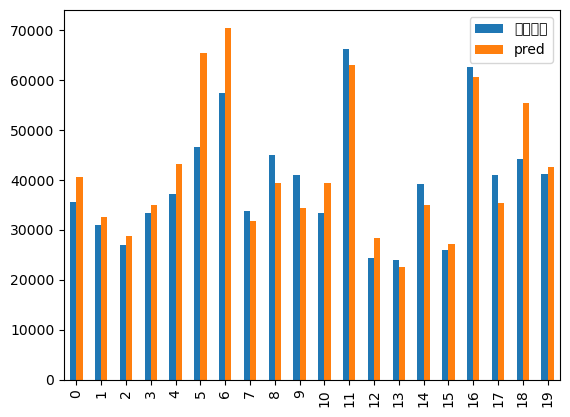

In [149]:
df_y.loc[0:19,:].plot(kind='bar')
plt.show()

In [153]:
df.head(2)

,시군구명,전용면적,층수,거래금액
0,경기도 오산시,83,10,33420
1,경기도 오산시,83,12,33380


In [138]:
import numpy as np

new_data = np.array([['경기도 오산시', 60, 9, 20320]])